In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
"""import sys
import scipy.cluster.hierarchy as sc
import kneed"""

'import sys\nimport scipy.cluster.hierarchy as sc\nimport kneed'

In [2]:
df = pd.read_pickle("sales.pkl")

In [3]:
df.head()

,user_id,store_partner,delivery_date,customer_province,gross_basket_delivered,source,month
0,27791,d25bfabaca150da1296148d555ad5cca,2019-01-28,RM,93.73,Ios-app,1
1,366484,9d1e8b3eca2a5725245e043f28b92d4d,2019-01-02,VR,72.28,Ios-app,1
2,717751,91c0f7100bde719c44790e7df757a1a6,2019-01-02,MI,152.69,website,1
3,1306963,18a5fc43689cfa082c65ee5b7c5eb69b,2019-01-02,BS,49.99,Ios-app,1
4,551754,d25bfabaca150da1296148d555ad5cca,2019-01-02,RM,23.70,website,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173218 entries, 0 to 173236
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   user_id                 173218 non-null  object        
 1   store_partner           173218 non-null  object        
 2   delivery_date           173218 non-null  datetime64[ns]
 3   customer_province       173106 non-null  object        
 4   gross_basket_delivered  173218 non-null  float64       
 5   source                  173218 non-null  object        
 6   month                   173218 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 10.6+ MB


In [5]:
df.user_id.nunique()

44724

In [6]:
df_pivot = np.round(pd.pivot_table(df, values='gross_basket_delivered', 
                                index='user_id', 
                                columns='source', 
                                aggfunc=np.sum),2)
df_pivot.fillna(0)

source,Android-app,Ios-app,mobile-website,unknown,website
user_id,,,,,
1118,0.0,0.00,0.00,0.0,31.15
1136,0.0,0.00,76.89,0.0,0.00
1141,0.0,390.92,0.00,0.0,0.00
1147,0.0,1160.64,0.00,0.0,0.00
1209,0.0,949.71,0.00,0.0,0.00
...,...,...,...,...,...
1653050,0.0,12.78,0.00,0.0,0.00
1653066,0.0,36.57,0.00,0.0,0.00
1653108,0.0,0.00,0.00,0.0,54.69


In [7]:
%%timeit
df_pivot.fillna(0)

2.13 ms ± 73.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44724 entries, 1118 to 1653284
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Android-app     12317 non-null  float64
 1   Ios-app         12210 non-null  float64
 2   mobile-website  9097 non-null   float64
 3   unknown         37 non-null     float64
 4   website         16899 non-null  float64
dtypes: float64(5)
memory usage: 2.0 MB


In [9]:
np.count_nonzero(df_pivot, axis=1) >= 2

array([ True,  True,  True, ...,  True,  True,  True])

In [10]:
df_pivot.loc[df_pivot.ge(1).sum(axis=1).ge(2)]

source,Android-app,Ios-app,mobile-website,unknown,website
user_id,,,,,
2164,NaN,NaN,160.35,NaN,206.81
2930,NaN,NaN,195.02,NaN,300.85
3797,31.68,NaN,NaN,NaN,31.38
3885,NaN,NaN,97.24,NaN,522.95
4476,NaN,1151.48,31.38,NaN,466.54
...,...,...,...,...,...
1641182,41.83,NaN,33.06,NaN,NaN
1641242,47.61,NaN,NaN,NaN,81.89
1641742,125.06,NaN,39.18,NaN,105.48


In [11]:
#cust_single_source = df_pivot.loc[~df_pivot.ge(1).sum(axis=1).ge(2)]
#cust_single_source.fillna(0)

In [12]:
#cust_single_source.count()

In [13]:
#cust_multiple_source = df_pivot.loc[df_pivot.ge(1).sum(axis=1).ge(2)]
#cust_multiple_source.fillna(0)

In [14]:
df_pivot["number_of_sources"] = (~df_pivot.isna()).sum(axis = 1)
df_pivot

source,Android-app,Ios-app,mobile-website,unknown,website,number_of_sources
user_id,,,,,,
1118,NaN,NaN,NaN,NaN,31.15,1
1136,NaN,NaN,76.89,NaN,NaN,1
1141,NaN,390.92,NaN,NaN,NaN,1
1147,NaN,1160.64,NaN,NaN,NaN,1
1209,NaN,949.71,NaN,NaN,NaN,1
...,...,...,...,...,...,...
1653050,NaN,12.78,NaN,NaN,NaN,1
1653066,NaN,36.57,NaN,NaN,NaN,1
1653108,NaN,NaN,NaN,NaN,54.69,1


In [15]:
df_pivot[df_pivot.number_of_sources>1]

source,Android-app,Ios-app,mobile-website,unknown,website,number_of_sources
user_id,,,,,,
2164,NaN,NaN,160.35,NaN,206.81,2
2930,NaN,NaN,195.02,NaN,300.85,2
3797,31.68,NaN,NaN,NaN,31.38,2
3885,NaN,NaN,97.24,NaN,522.95,2
4476,NaN,1151.48,31.38,NaN,466.54,3
...,...,...,...,...,...,...
1641182,41.83,NaN,33.06,NaN,NaN,2
1641242,47.61,NaN,NaN,NaN,81.89,2
1641742,125.06,NaN,39.18,NaN,105.48,3


In [16]:
df_pivot.drop(columns="unknown",inplace=True)

<AxesSubplot:xlabel='number_of_sources'>

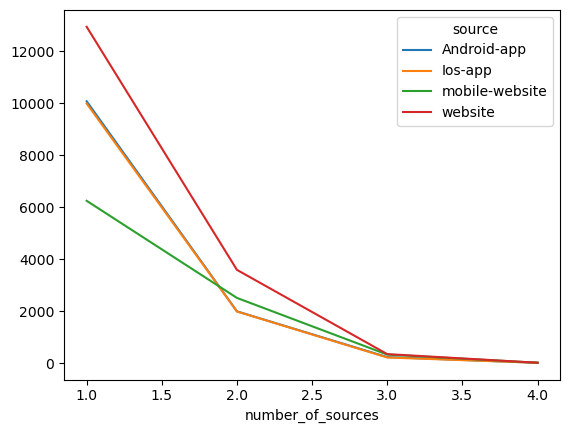

In [17]:
df_pivot.groupby(["number_of_sources"]).count().plot()
#.unstack(level=1)

<AxesSubplot:xlabel='number_of_sources'>

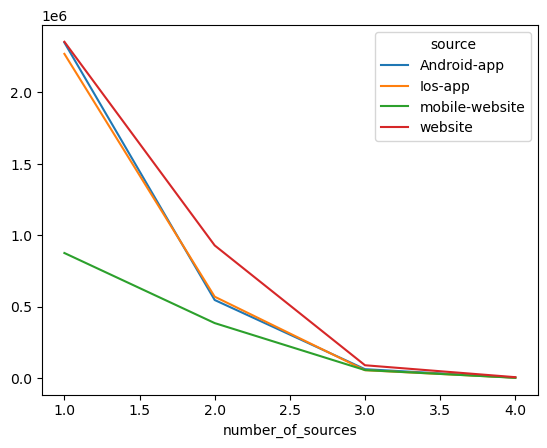

In [18]:
df_pivot.groupby(["number_of_sources"]).sum().plot()


In [19]:
df.store_partner.unique()

array(['d25bfabaca150da1296148d555ad5cca',
       '9d1e8b3eca2a5725245e043f28b92d4d',
       '91c0f7100bde719c44790e7df757a1a6',
       '18a5fc43689cfa082c65ee5b7c5eb69b',
       '4cb5932704bda2e7e914733a3fa72e4d',
       'e7371e76f5037e256e19a59f7c6202d7',
       '0b5cb0ec5f538ad96aec1269bec93c9c',
       '36a56a6d8cdf3cd9f3ed28f45edc228e',
       '6786836d1f31bd2394c92e3128725e26',
       '7d0a652939fef190954db21b4fb37bcf',
       'bd976df7c4663d5ac72e0320fc4bfdd2',
       'cf410365e977767a935a7965b6e67a8b',
       '0c40e524973a3c36893b13a6f7a4fc62',
       'bd0e6da36e55f57ddd98b6af62f6e617',
       'e5df8553e6dfe93a913a60f86d926b80',
       'be122233807deb908a710b4f0ff21d16'], dtype=object)

In [20]:
stores = []
for x in range(1,16+1) : stores.append("Store - "+str(x))

In [21]:
#len(stores)
#len(df.store_partner.unique())

In [22]:
store_map = pd.DataFrame(stores,columns=["store"])
store_map["store_partner"] = df.store_partner.unique()

In [23]:
store_map

,store,store_partner
0,Store - 1,d25bfabaca150da1296148d555ad5cca
1,Store - 2,9d1e8b3eca2a5725245e043f28b92d4d
2,Store - 3,91c0f7100bde719c44790e7df757a1a6
3,Store - 4,18a5fc43689cfa082c65ee5b7c5eb69b
4,Store - 5,4cb5932704bda2e7e914733a3fa72e4d
5,Store - 6,e7371e76f5037e256e19a59f7c6202d7
6,Store - 7,0b5cb0ec5f538ad96aec1269bec93c9c
7,Store - 8,36a56a6d8cdf3cd9f3ed28f45edc228e
8,Store - 9,6786836d1f31bd2394c92e3128725e26
9,Store - 10,7d0a652939fef190954db21b4fb37bcf


In [24]:
#df["store"] =df["store_partner"].map(lambda x: store_map[store_map["store_partner"] == x]["store"])

In [28]:
df = pd.merge(df,store_map,on='store_partner',how='left')

In [30]:
df.drop(columns=["store_partner"])

,user_id,delivery_date,customer_province,gross_basket_delivered,source,month,store
0,27791,2019-01-28,RM,93.73,Ios-app,1,Store - 1
1,366484,2019-01-02,VR,72.28,Ios-app,1,Store - 2
2,717751,2019-01-02,MI,152.69,website,1,Store - 3
3,1306963,2019-01-02,BS,49.99,Ios-app,1,Store - 4
4,551754,2019-01-02,RM,23.70,website,1,Store - 1
...,...,...,...,...,...,...,...
173213,1601626,2019-06-20,RM,63.27,Android-app,6,Store - 1
173214,1470760,2019-06-20,MI,22.97,mobile-website,6,Store - 6
173215,1639454,2019-06-20,RM,31.54,Android-app,6,Store - 6
173216,1234975,2019-06-20,RM,30.41,Android-app,6,Store - 6
